# https://colab.research.google.com/

# Apprendre à coder en Python pour l'Intelligence Artificielle
## Episode 3 - Construire un Test ADN

<p align="center">
<a href="https://youtu.be/8fCtWNnBNFc" target="_blank" ><img  src="https://github.com/anisayari/Youtube-apprendre-python-intelligence-artificielle/blob/master/%233%20-%201er%20Projet%20-%20Construire%20un%20Test%20ADN/cover-serie-3.png?raw=true" width="800" height="auto"/></a>
</p>

## Construction de notre population

In [ ]:
!pip install dna_features_viewer

     |████████████████████████████████| 2.3MB 5.4MB/s 
  Created wheel for dna-features-viewer: filename=dna_features_viewer-3.0.1-cp36-none-any.whl size=30517 sha256=97537268acb700417540cc60e409411e2690b2aed4cbe0a14d58f93d3a6a4579
  Stored in directory: /root/.cache/pip/wheels/48/83/d1/8f63b154abe085e3c258d0cecf7b0fc20e66d24d5b1a7f7251
Successfully built dna-features-viewer


In [ ]:
class Human():

  def __init__(self, genes, couleur_de_cheveux, couleur_des_yeux, taille, poids, age, name):
    self.genes = genes
    self.couleur_de_cheveux = couleur_de_cheveux
    self.couleur_des_yeux = couleur_des_yeux
    self.taille = taille
    self.poids = poids
    self.age=age
    self.name = name

  def get_description(self):
    print(f"il s'agit de {self.name} qui a {self.age}ans, il mesure {self.taille}cm, \
il pèse {self.poids}kg, il a les cheveux {self.couleur_de_cheveux} et il a les yeux \
{self.couleur_des_yeux}.")


genes1 = {'sequence':"ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT",
    'genes': {
            'genes1':(1,5),
            'genes2':(3,9),
            'genes3':(10,15),
            'genes4':(13,19),
            'genes5':(17,24),
            'genes6':(25,35),
            'genes7':(34,42),
            'genes8':(27,57),
            'genes9':(54,60),
            'genes10':(60,70)
          }
}

genes2 = {'sequence':"TACCAACACGCCATGCATGCATGCATGCATGCATGCATGCAGGCCTTATGGCCATGCAGTAGGGTCCTG",
    'genes': {
            'genes1':(1,5),
            'genes2':(2,12),
            'genes3':(11,41),
            'genes4':(19,28),
            'genes5':(26,35),
            'genes6':(30,36),
            'genes7':(36,41),
            'genes8':(40,45),
            'genes9':(52,58),
            'genes10':(58,70)
          }
}

# *args, **kwargs
CR7 = Human(genes1, 'noir', 'marron', 187, 84, 35, 'Cristiano Ronaldo')
CJ = Human(genes2, 'noir', 'marron', 153, 45, 9, 'Cristiano Junior')

CR7.get_description()
CJ.get_description()

il s'agit de Cristiano Ronaldo qui a 35ans, il mesure 187cm, il pèse 84kg, il a les cheveux noir et il a les yeux marron.
il s'agit de Cristiano Junior qui a 9ans, il mesure 153cm, il pèse 45kg, il a les cheveux noir et il a les yeux marron.


In [ ]:
CR7.genes #récupérer l'attribut genes de l'objet Human CR7

{'genes': {'genes1': (1, 5),
  'genes10': (60, 70),
  'genes2': (3, 9),
  'genes3': (10, 15),
  'genes4': (13, 19),
  'genes5': (17, 24),
  'genes6': (25, 35),
  'genes7': (34, 42),
  'genes8': (27, 57),
  'genes9': (54, 60)},
 'sequence': 'ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT'}

In [ ]:
CR7.genes.keys() #recupérer les clés du dictionnaire genes

dict_keys(['sequence', 'genes'])

In [ ]:
CR7.genes.values() #récupérer les valeurs du dictionnaire genes

dict_values(['ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT', {'genes1': (1, 5), 'genes2': (3, 9), 'genes3': (10, 15), 'genes4': (13, 19), 'genes5': (17, 24), 'genes6': (25, 35), 'genes7': (34, 42), 'genes8': (27, 57), 'genes9': (54, 60), 'genes10': (60, 70)}])

In [ ]:
CR7.genes['genes'].keys()

dict_keys(['genes1', 'genes2', 'genes3', 'genes4', 'genes5', 'genes6', 'genes7', 'genes8', 'genes9', 'genes10'])

In [ ]:
CJ.genes

{'genes': {'genes1': (1, 5),
  'genes10': (58, 70),
  'genes2': (2, 12),
  'genes3': (11, 41),
  'genes4': (19, 28),
  'genes5': (26, 35),
  'genes6': (30, 36),
  'genes7': (36, 41),
  'genes8': (40, 45),
  'genes9': (52, 58)},
 'sequence': 'TACCAACACGCCATGCATGCATGCATGCATGCATGCATGCAGGCCTTATGGCCATGCAGTAGGGTCCTG'}

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


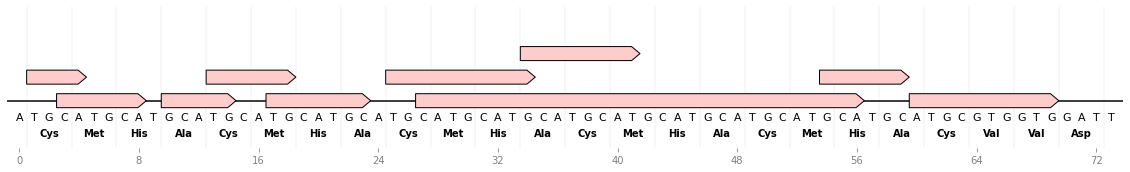

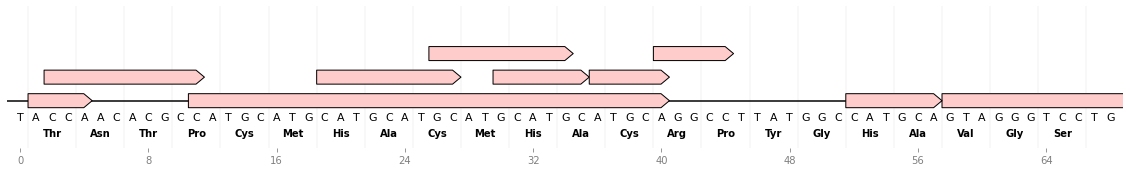

In [ ]:
from dna_features_viewer import GraphicFeature, GraphicRecord

def print_sequence_dna(genes):
  sequence_gene = genes['sequence']

  features_gene = []
  for gene_ in genes['genes'].values():
    features_gene.append(GraphicFeature(start=gene_[0], end=gene_[1], strand=+1, color='#ffcccc'))

  record = GraphicRecord(sequence=sequence_gene, features=features_gene)

  ax, _ = record.plot(figure_width=20)
  record.plot_sequence(ax)
  record.plot_translation(ax, (1, len(sequence_gene)), fontdict={'weight': 'bold'})


print_sequence_dna(CR7.genes)
print_sequence_dna(CJ.genes)


## Construction de notre logique de Test

In [ ]:
"""
{'genes': {'genes1': (1, 5),
  'genes10': (58, 70),
  'genes2': (2, 12),
  'genes3': (11, 41),
  'genes4': (19, 28),
  'genes5': (26, 35),
  'genes6': (30, 36),
  'genes7': (36, 41),
  'genes8': (40, 45),
  'genes9': (52, 58)},
 'sequence': 'TACCAACACGCCATGCATGCATGCATGCATGCATGCATGCAGGCCTTATGGCCATGCAGTAGGGTCCTG'}
"""
list_genes_CR7 = []
for genes_ in CR7.genes['genes'].values():
  #print(CR7.genes['sequence'][genes_[0]:genes_[1]],genes_[0],genes_[1])
  list_genes_CR7.append(CR7.genes['sequence'][genes_[0]:genes_[1]])

list_genes_CJ = []
for genes_ in CJ.genes['genes'].values():
  #print(CJ.genes['sequence'][genes_[0]:genes_[1]],genes_[0],genes_[1])
  list_genes_CJ.append(CJ.genes['sequence'][genes_[0]:genes_[1]])

print('CJ: ',list_genes_CJ)
print('CR7: ',list_genes_CR7)

CJ:  ['ACCA', 'CCAACACGCC', 'CATGCATGCATGCATGCATGCATGCATGCA', 'CATGCATGC', 'GCATGCATG', 'GCATGC', 'ATGCA', 'AGGCC', 'CATGCA', 'GTAGGGTCCTG']
CR7:  ['TGCA', 'CATGCA', 'GCATG', 'TGCATG', 'TGCATGC', 'TGCATGCATG', 'GCATGCAT', 'CATGCATGCATGCATGCATGCATGCATGCA', 'GCATGC', 'ATGCGTGGTG']


In [ ]:
%time
a = []
for i in range(1000000):
  a.append(i)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
%time
#list compréhension
a = [i for i in range(1000000)]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [ ]:
%time
#DIRTY WAY
print('DIRTY WAY')
for genes_CR7 in list_genes_CR7 :
  for genes_CJ in list_genes_CJ :
    if genes_CR7 == genes_CJ :
      print('Gene en commun!', genes_CR7)

@TODO
#Créer une fonction pour comparer les genes et sortir le pourcentage sur plusieurs personnes

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
DIRTY WAY
Gene en commun! CATGCA
Gene en commun! CATGCATGCATGCATGCATGCATGCATGCA
Gene en commun! GCATGC


In [ ]:
%time
#SOFT WAY
print('SOFT WAY')
nombre_de_genes_en_commun = 0
for genes_CR7 in list_genes_CR7 :
  if genes_CR7 in list_genes_CJ:
    print('Gene en commun!', genes_CR7)
    nombre_de_genes_en_commun = nombre_de_genes_en_commun + 1

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
SOFT WAY
Gene en commun! CATGCA
Gene en commun! CATGCATGCATGCATGCATGCATGCATGCA
Gene en commun! GCATGC


In [ ]:
print(f'{CR7.name} et {CJ.name} ont {(nombre_de_genes_en_commun/10)*100}% de genes en commun')

Cristiano Ronaldo et Cristiano Junior ont 30.0% de genes en commun


In [ ]:
%time
a = [1,2,2,3,1]
list(set(a)) #le set sert à enlever les doublons et a organiser la list

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


[1, 2, 3]

In [ ]:
CR7.genes['sequence']

'ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT'

In [ ]:
phrase = 'Cristiano Ronaldo dos Santos Aveiro GOIH ComM (European Portuguese: [kɾiʃˈtjɐnu ʁɔˈnaɫdu]; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for Serie A club Juventus and captains the Portugal national team.'

print(phrase[:20]) #une lsite commence à 0 !! On peut accéder aux donnés par index
a=[1,2,3]

compteur = 0
for i in phrase[:20]:
  compteur = compteur +1
print(compteur)

len(a)

Cristiano Ronaldo do
20


3

In [ ]:
phrase[20:30]

's Santos A'

In [ ]:
a = (1, 5)
print(a[0])
print(a[1])

1
5


In [ ]:
#ajouter un element dans une list
a = [1,2,3]

a.append(4)
print(a)

[1, 2, 3, 4]


# UTILS

In [ ]:
genes = { 'sequence':"ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGC",
    'genes': {
            'genes1':(1,5),
            'genes2':(3,9),
            'genes3':(10,25),
            'genes4':(20,28)
          }
}

for gene_ in genes['genes'].values():
  print(gene_[0],gene_[1])

1 5
3 9
10 25
20 28


In [ ]:
genes1 = { 'sequence':"ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT",
    'genes': {
            'genes1':(0,5),
            'genes2':(3,9),
            'genes3':(10,15),
            'genes4':(13,19),
            'genes5':(17,24),
            'genes6':(25,35),
            'genes7':(34,42),
            'genes8':(27,57),
            'genes9':(54,60),
            'genes10':(60,70)
          }
}
seq = genes1['sequence']
for gene_ in genes['genes']:
  print(gene_,seq[genes['genes'][gene_][0]:genes['genes'][gene_][1]],genes['genes'][gene_][0],genes['genes'][gene_][1])


{(1, 5)}
{(3, 9)}
{(10, 25)}
{(20, 28)}


[None, None, None, None]

In [ ]:
#gene[28:34] = 'GCATGC'
#gene[56:62]= 'TGCATG'
genes= 'TACCAACACGCGTTAGGTGGCACGTTGCGAAGCTGCTTGACGGCCTTATGGCCCGGTGGTAGGGTCCTG'
print(genes,len(genes))
start = 11
end = 41
genes = genes[:start] + 'CATGCATGCATGCATGCATGCATGCATGCA' + genes[end:]

start = 52
end = 58
genes_tmp = genes[:start] + 'CATGCA' + genes[end:]
print(genes_tmp,len(genes_tmp))

In [ ]:
genes3 = { 'sequence':"ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT",
    'genes': {
            'genes1':(1,5),
            'genes2':(3,9),
            'genes3':(10,15),
            'genes4':(13,19),
            'genes5':(17,24),
            'genes6':(25,35),
            'genes7':(34,42),
            'genes8':(27,57),
            'genes9':(54,60),
            'genes10':(60,70)
          }
}